In [1]:
import urllib
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
import shutil
import os
import time
import cv2
import matplotlib.pyplot as plt 
def init_driver():
    chrome_options = webdriver.ChromeOptions()
    ua = "Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.114 Safari/537.36"
    chrome_options.add_argument("user-agent={}".format(ua))
    driver = webdriver.Chrome(executable_path=ChromeDriverManager().install(), options=chrome_options)
    return driver

def check_image_same_row(np_img):
    x = np_img.shape[0]//3 # 100
    r = x
    status = 0
    true = 0
    for i in range(0,2):
        r1_under = np_img[r-1:r,0:x] # 下行
        r2_above = np_img[r:r+1,0:x] # 上行
        r1_under_sum = sum(r1_under[0])
        r2_above_sum = sum(r2_above[0])
        np_pixel_diff = abs(r1_under_sum - r2_above_sum)
        print("----->", np_pixel_diff, r1_under_sum, r2_above_sum)
        if np_pixel_diff < 800:
            true += 1
        r += x
    
    if true == 2:
        status = 1
    return status

def download_image(url, name="train"):
    urllib.request.urlretrieve(url, "data/images/" + name + ".jpg")

def move_image(name="train", status=0):
    if status == 0:
        file = "3x3/"
    elif status == 1:
        file = "4x4/"
    else:
        file = ""
    path = "data/images/" + file + name +"/"
    
    if not os.path.isdir(path):
        os.mkdir(path)
    list_os_file = os.listdir(path)
    if len(list_os_file) == 0:
        number = 1
    else:
        number = len(list_os_file) + 1

    oldpath = "data/images/" + "train.jpg"
    newpath = path + str(number) + ".jpg" 
    shutil.copyfile(oldpath, newpath)

def move_image_to_yolo(name="train", status=0):
    path = "data/images/train/"
    list_os_file = os.listdir(path)
    if len(list_os_file) == 0:
        number = 1 
    else:
        number = len(list_os_file) + 1
    oldpath = "data/images/" + "train.jpg"
    newpath = path + str(number) + ".jpg" 
    shutil.copyfile(oldpath, newpath)

In [2]:
url = "https://www.google.com/search?q="
query_key = "123"
driver = init_driver()
driver.get("https://www.google.com/search?q=allintitle%3A+water%20ionizer%20system%20company")
time.sleep(0.1)
xf = driver.find_element_by_xpath("/html/body/div[1]/form/div/div/div/iframe")
driver.switch_to.frame(xf)
driver_iframe = driver.find_element_by_xpath('/html/body/div[2]/div[3]/div[1]/div/div/span/div[1]')
driver_iframe.click()
time.sleep(0.1)
driver.switch_to.default_content()
xf2 =driver.find_element_by_xpath('/html/body/div[2]/div[4]/iframe')
driver.switch_to.frame(xf2)



====== WebDriver manager ======
Current google-chrome version is 100.0.4896
Get LATEST chromedriver version for 100.0.4896 google-chrome
Driver [C:\Users\top\.wdm\drivers\chromedriver\win32\100.0.4896.60\chromedriver.exe] found in cache
C:\python3_27\envs\seo_env\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  del sys.path[0]
C:\python3_27\envs\seo_env\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  
C:\python3_27\envs\seo_env\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  
C:\python3_27\envs\seo_env\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  if sys.path[0] == '

In [8]:
for i in range(0,2000): 
    time.sleep(0.1)
    try:
        driver_if2 = driver.find_element_by_xpath("/html/body/div/div/div[2]/div[1]/div[1]/div/strong")
        label = driver_if2.text
        url = driver_if2.find_element_by_xpath('/html/body/div/div/div[2]/div[2]/div/table/tbody/tr[1]/td[2]/div/div[1]/img').get_attribute('src')

        download_image(url)
        img = cv2.imread('data/images/train.jpg', cv2.IMREAD_GRAYSCALE)
        status = check_image_same_row(img)
        move_image(label, status)
        move_image_to_yolo()
        driver.find_element_by_xpath("/html/body/div/div/div[3]/div[2]/div[1]/div[1]/div[1]/button").click()
    except:
        time.sleep(5)
        print("錯誤")

C:\python3_27\envs\seo_env\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  after removing the cwd from sys.path.
C:\python3_27\envs\seo_env\lib\site-packages\selenium\webdriver\remote\webelement.py:393: UserWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  warnings.warn("find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead")
C:\python3_27\envs\seo_env\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  del sys.path[0]


-----> 65 8127 8062
-----> 17 8547 8564
-----> 2477 11667 14144
-----> 13668 16807 3139
-----> 5238 6487 11725
-----> 4547 16107 11560
-----> 7008 9417 16425
-----> 8398 7655 16053
-----> 5413 8037 13450
-----> 2054 13350 15404
-----> 9623 8588 18211
-----> 2723 10403 13126
-----> 9623 16099 6476
-----> 4097 10212 6115
-----> 2131 9949 7818
-----> 1763 8994 7231
-----> 7548 9982 17530
-----> 6672 11641 18313
-----> 226 7883 7657
-----> 92 12649 12557
-----> 2028 15285 13257
-----> 752 15847 16599
-----> 6779 7642 14421
-----> 3882 14019 10137
-----> 6451 11857 5406
-----> 8095 6698 14793
-----> 94 27383 27289
-----> 366 14479 14845
-----> 4413 13952 18365
-----> 378 9044 9422
-----> 7985 14711 6726
-----> 8213 10209 18422
-----> 28 14256 14228
-----> 29 12752 12781
-----> 304 12599 12903
-----> 69 20688 20757
-----> 3808 10017 13825
-----> 1050 8206 7156
-----> 6191 15338 21529
-----> 4734 15721 10987
-----> 5474 14008 19482
-----> 2479 16519 14040
-----> 2195 12333 14528
-----> 145 12

-----> 11106 9412 20518
-----> 30 10432 10462
-----> 384 9638 9254
-----> 61 15374 15313
-----> 4446 9336 4890
-----> 12950 4311 17261
-----> 162 18856 19018
-----> 228 8058 7830
-----> 7907 17338 9431
-----> 10896 7588 18484
-----> 2494 11037 13531
-----> 1739 16396 18135
-----> 12684 5776 18460
-----> 340 11801 12141
-----> 250 27307 27057
-----> 1026 14472 13446
-----> 857 6882 7739
-----> 3181 16332 19513
-----> 9645 7242 16887
-----> 947 15163 14216
-----> 10299 5592 15891
-----> 1440 15603 14163
-----> 1870 10825 12695
-----> 2618 10942 8324
-----> 227 9294 9521
-----> 201 14533 14332
-----> 6336 12858 6522
-----> 8365 8793 17158
-----> 5687 9134 14821
-----> 203 18128 18331
-----> 3536 10579 14115
-----> 9823 11756 21579
-----> 6882 7677 14559
-----> 1195 14112 12917
-----> 366 25632 25266
-----> 417 18478 18895
-----> 8904 9852 18756
-----> 5955 11229 5274
-----> 1494 10336 8842
-----> 133 15732 15599
-----> 4857 10110 14967
-----> 3309 13020 16329
-----> 12141 7352 19493
-----

-----> 1931 9542 7611
-----> 2305 13645 11340
-----> 342 26979 26637
-----> 280 21620 21340
-----> 2672 15299 12627
-----> 5936 11896 17832
-----> 317 10649 10332
-----> 6188 12363 18551
-----> 4939 10370 15309
-----> 952 10742 11694
-----> 163 19826 19989
-----> 681 22192 22873
-----> 18 31840 31858
-----> 606 14570 13964
-----> 3634 9488 13122
-----> 1087 10277 9190
-----> 5038 11924 6886
-----> 2991 8703 11694
-----> 3260 14368 17628
-----> 5005 11083 16088
-----> 4450 15123 19573
-----> 4446 11018 15464
-----> 346 30385 30039
-----> 73 18970 19043
-----> 61 19650 19589
-----> 718 22984 23702
-----> 2870 24765 21895
-----> 68 18066 18134
-----> 4013 16840 12827
-----> 5913 5841 11754
-----> 595 13917 14512
-----> 5679 16371 10692
-----> 1099 17181 16082
-----> 7288 10677 17965
-----> 8260 10549 18809
-----> 1820 12981 14801
-----> 3 24355 24358
-----> 256 11833 12089
-----> 142 6655 6797
-----> 140 23052 23192
-----> 1994 11706 9712
-----> 7940 15417 7477
-----> 448 10705 10257
----

-----> 27 22664 22691
-----> 527 13108 12581
-----> 396 10439 10043
-----> 158 19550 19708
-----> 1768 10779 9011
-----> 12478 7252 19730
-----> 2014 11053 9039
-----> 792 11406 10614
-----> 536 29201 29737
-----> 40 23504 23544
-----> 235 14890 14655
-----> 277 21177 20900
-----> 342 23079 22737
-----> 562 21870 21308
-----> 1606 11397 9791
-----> 8195 10145 18340
-----> 676 8233 8909
-----> 1344 8179 9523
-----> 8517 13356 4839
-----> 2178 8529 10707
-----> 50 12216 12266
-----> 115 16143 16258
-----> 11 16888 16899
-----> 306 18506 18200
-----> 1053 14923 15976
-----> 2167 12691 14858
-----> 6227 16145 9918
-----> 0 6962 6962
-----> 137 12137 12274
-----> 86 3290 3376
-----> 3897 7933 11830
-----> 938 15662 16600
-----> 36 23864 23900
-----> 19 24363 24382
-----> 5152 8851 3699
-----> 8611 15204 6593
-----> 114 13154 13040
-----> 3518 23871 20353
-----> 969 14570 15539
-----> 73 11931 11858
-----> 266 22058 22324
-----> 2380 11251 13631
-----> 2655 10421 13076
-----> 1234 10113 8879

-----> 177 20102 19925
-----> 107 10929 10822
-----> 8320 9978 18298
-----> 3943 7495 11438
-----> 6900 7479 14379
-----> 1173 15830 17003
-----> 1186 11944 13130
-----> 2909 5846 8755
-----> 9773 4383 14156
-----> 2647 5586 8233
-----> 341 19244 19585
-----> 13 19632 19645
-----> 4867 6620 11487
-----> 3641 13854 17495
-----> 5984 12713 6729
-----> 5259 14880 9621
-----> 1144 9820 8676
-----> 8262 13438 5176
-----> 702 26255 25553
-----> 814 16335 17149
-----> 8749 12394 21143
-----> 1109 13562 14671
-----> 7723 8399 16122
-----> 2781 19856 17075
-----> 18 13660 13678
-----> 109 20720 20829
-----> 5447 12820 7373
-----> 1585 11700 13285
-----> 6998 10904 17902
-----> 6875 13770 6895
-----> 7600 8698 16298
-----> 4811 7587 2776
-----> 8266 7617 15883
-----> 4475 13670 18145
-----> 6667 11388 18055
-----> 2137 13692 15829
-----> 7531 9425 16956
-----> 1881 9837 7956
-----> 5588 9084 14672
-----> 9091 12327 21418
-----> 6835 6923 13758
-----> 7687 11317 3630
-----> 2713 10881 13594
-----

-----> 4 24621 24625
-----> 93 21409 21316
-----> 2707 12276 14983
-----> 6443 11401 4958
-----> 6998 8940 15938
-----> 7947 8880 16827
-----> 5902 15481 9579
-----> 2989 11507 8518
-----> 133 15230 15097
-----> 4164 9206 13370
-----> 280 20713 20433
-----> 1380 20796 19416
-----> 9566 14758 5192
-----> 2387 10419 8032
-----> 3 22804 22807
-----> 26 25549 25575
-----> 11586 7333 18919
-----> 1436 14245 12809
-----> 2090 15197 17287
-----> 5015 8784 13799
-----> 68 9874 9806
-----> 47 11157 11110
-----> 1394 10967 12361
-----> 3149 12422 9273
-----> 796 17924 17128
-----> 73 13931 13858
-----> 18 23920 23938
-----> 16 13298 13314
-----> 1714 9648 7934
-----> 854 9965 9111
-----> 6236 14261 20497
-----> 7685 9125 16810
-----> 2698 7463 4765
-----> 1385 8819 7434
-----> 390 27919 27529
-----> 381 17948 18329
-----> 5027 13953 18980
-----> 8882 4694 13576
-----> 33 17276 17243
-----> 6 12871 12877
-----> 124 9186 9310
-----> 205 15542 15747
-----> 178 13481 13659
-----> 2437 14486 16923
--

-----> 3789 14331 10542
-----> 8200 9435 17635
-----> 7066 15553 8487
-----> 9822 10550 20372
-----> 4528 9050 13578
-----> 8072 13714 5642
-----> 7 24308 24315
-----> 267 20706 20439
-----> 17 8001 7984
-----> 91 13085 13176
-----> 9938 8742 18680
-----> 12156 7864 20020
-----> 17 24918 24901
-----> 70 14585 14515
-----> 8260 11245 19505
-----> 1980 6124 8104
-----> 32 25780 25812
-----> 2353 16927 14574
-----> 7770 9130 16900
-----> 4180 13699 17879
-----> 4758 12013 16771
-----> 10968 10063 21031
-----> 607 16428 15821
-----> 2392 11386 8994
-----> 2818 16433 19251
-----> 11344 7400 18744
-----> 5 17851 17856
-----> 68 16813 16745
-----> 1763 10522 12285
-----> 2944 10799 7855
-----> 6637 12775 19412
-----> 13077 6078 19155
-----> 8742 6508 15250
-----> 2254 9891 12145
-----> 5171 12631 17802
-----> 5983 12343 6360
-----> 7785 9753 17538
-----> 670 9447 8777
-----> 6767 16133 9366
-----> 6530 10031 16561
-----> 187 11476 11289
-----> 34 7010 6976
-----> 5581 12341 6760
-----> 1055 8

-----> 10422 16046 5624
-----> 3047 7967 11014
-----> 322 8396 8718
-----> 4010 7311 11321
-----> 15912 3982 19894
-----> 3519 9458 5939
-----> 68 16012 15944
-----> 8055 8657 16712
-----> 8053 9152 17205
-----> 8931 11648 20579
-----> 6514 7577 14091
-----> 6818 14252 7434
-----> 1372 6550 7922
-----> 11969 6631 18600
-----> 2728 7191 4463
-----> 3283 10426 13709
-----> 1210 13664 12454
-----> 2264 9532 11796
-----> 68 16976 17044
-----> 107 24901 24794
-----> 298 12600 12302
-----> 4528 14641 19169
-----> 12 27072 27084
-----> 238 16144 15906
-----> 8442 14248 5806
-----> 13145 2813 15958
-----> 12 27737 27725
-----> 27 26577 26550
-----> 982 9613 10595
-----> 15268 7914 23182
-----> 8055 10242 18297
-----> 8699 9958 18657
-----> 9313 8323 17636
-----> 1903 12193 14096
-----> 14 26220 26234
-----> 252 12603 12351
-----> 1788 11585 9797
-----> 3825 14719 18544
-----> 5653 18217 12564
-----> 6373 13812 7439
-----> 742 10656 9914
-----> 7731 13147 5416
-----> 6747 10264 17011
-----> 625

KeyboardInterrupt: 

## 圖片分析

In [10]:
# , cv2.IMREAD_GRAYSCALE
img = cv2.imread('data/images/test.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('data/images/test2.jpg', cv2.IMREAD_GRAYSCALE)

((300, 300), <matplotlib.image.AxesImage at 0x1985a353108>)

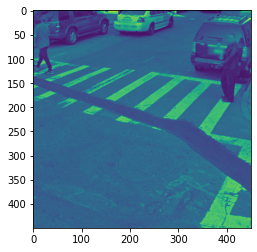

In [15]:
img.shape, plt.imshow(img2)

In [12]:
x = img.shape[0]//3

In [78]:
def check_image_same_row(np_img):
    x = np_img.shape[0]//3 # 100
    r = x
    status = 0
    true = 0
    for i in range(0,2):
        r1_under = np_img[r-1:r,0:x] # 下行
        r2_above = np_img[r:r+1,0:x] # 上行
        r1_under_sum = sum(r1_under[0])
        r2_above_sum = sum(r2_above[0])
        np_pixel_diff = abs(r1_under_sum - r2_above_sum)
        # print("----->", np_pixel_diff, r1_under_sum, r2_above_sum)
        if np_pixel_diff < 200:
            true += 1
        r += x
    
    if true == 2:
        status = 1
    return status
      
def split_image():
    pass


In [79]:
check_image_same_row(img)

0

In [80]:
check_image_same_row(img2)

1

## 下載圖片並且分類